Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [19]:
NICKNAME = "gluk2003"

---

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [21]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    # YOUR CODE HERE
    x_n1 = x0
    x_n = x0 + 2 * eps
    i = 0

    while abs(x_n1 - x_n) >= eps and i < maxiter:
        x_n = x_n1
        x_n1 = x_n - f(x_n) / fder(x_n)

        i += 1
    x, niter = float(x_n1), i
    return x, niter

In [22]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

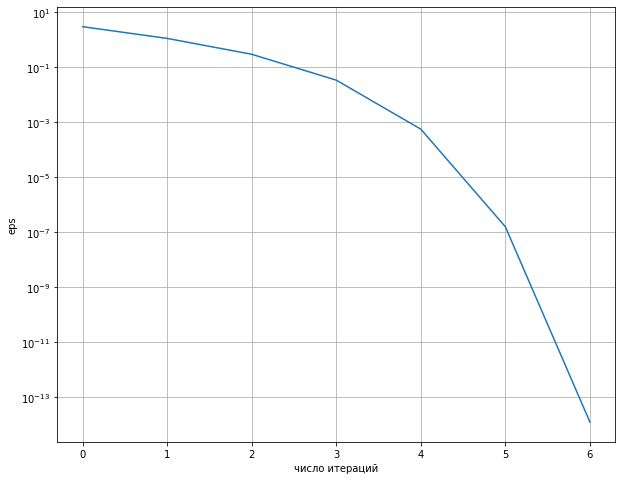

In [23]:
# YOUR CODE HERE
_, mnit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
xx = []
nit = []
for i in range(0, mnit + 1):
    v_xx, v_nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4, maxiter=i)
    xx.append(v_xx)
    nit.append(v_nit)

plt.figure(figsize=(10, 8))
plt.plot(nit, np.array(xx) - 1)
plt.yscale('log')
plt.xlabel('число итераций')
plt.ylabel('eps')
plt.grid()
plt.show()

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

In [24]:
'''Сходимость метода - квадратичная'''

'Сходимость метода - квадратичная'

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [25]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    # YOUR CODE HERE
    x_n1 = x0
    x_n = x0 + 2 * eps
    i = 0

    while abs(x_n1 - x_n) >= eps and i < maxiter:
        x_n = x_n1
        x_n1 = x_n - m * f(x_n) / fder(x_n)

        i += 1
    x, it = float(x_n1), i
    return x, it
    return x, it

In [26]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

In [27]:
# YOUR CODE HERE
f = lambda x: (x ** 2 - 1) ** 2
f_der = lambda x: 2 * (x ** 2 - 1) * 2 * x
nit_list = []

for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(f, f_der, x0=2, m=m, maxiter=100000)
    print(m, nit)

1 18
2 5
3 17
4 100000
5 100000
6 100000


In [28]:
'''При m равном кратности корня необходимо наименьшее кол-во итераций, сходимость квадратичная.
    При остальных значениях сходимость линейная'''

'При m равном кратности корня необходимо наименьшее кол-во итераций, сходимость квадратичная.\n    При остальных значениях сходимость линейная'

# Part III. Newton's fractal.

(4 дополнительных балла)

Consider the equation
$$ x^3 = 1 $$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the **{basins of attraction}** of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. Color the grid in three colors, according to the root, to which iterations converged.


In [29]:
# YOUR CODE HERE


# Часть IV. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [30]:
from scipy.linalg import solve
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Якобиан `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    # YOUR CODE HERE
    x_n1 = X0
    x_n = X0 + 2 * eps
    i = 0

    while np.linalg.norm(x_n1 - x_n) >= eps and i < maxiter:
        x_n = x_n1
        dx = solve(jcb(x_n), -F(x_n))
        x_n1 = x_n + dx

        i += 1
    X, niter = x_n1, i
    return X, niter

In [31]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1,
                     X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                     [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

Напишите функцию, возвращающую матрицу якобиана функции трех переменных `func2`:

In [32]:
from sympy import diff, symbols, lambdify, Matrix
def func2(X):
    x, y, z = X
    return np.array([x**2 + y**2 + z**2 - 25,
                     x*y + y*z + z*x - 5,
                     x + y - 3])

def jac2(X):
    r"""Return the Jacobian of `func2(X)`.
    
    
    The Jacobian matrix is defined as 
    
    $$
    J_{ij} = \partial f_i / \partial x_j
    $$
    
    so that the first row contains the derivatives of $f_0$
    with respect to the first, second etc coordinates; the second
    row contains the derivatives of $f_1$ with respect to
    the first, second etc coordinates; and so on.
    """
    # YOUR CODE HERE
    x_v, y_v, z_v = X
    x, y, z = symbols('x y z')
    f1, f2, f3 = func2([x, y, z])
    F = Matrix([f1, f2, f3])
    J = F.jacobian([x, y ,z])
    s = (x, y, z)
    J_func = lambdify(s, J, modules='numpy')
    J_ev = J_func(x_v, y_v, z_v)
    
    return J_ev


In [33]:
X = [1, 2, 3]
jac2(X)

array([[2, 4, 6],
       [5, 4, 3],
       [1, 1, 0]])

In [34]:
X = [1, 2, 3]
assert jac2(X).shape == (3, 3)


In [35]:
# more testing in this cell, keep it intact
